## Import dependencies

In [1]:
import librosa
import seaborn as sns
import numpy as np
import tensorflow as tf
import os
import IPython.display as ipd
import noisereduce as nr
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from scipy.signal import butter, lfilter
from tensorflow import keras

## Data Visualisation

In [2]:
dataset_path = r'C:\Users\leeju\BirdProject\dataset_updated'

In [31]:
# function to return bird name from first index with dot seperation
def extract_bird_name(bird_name):
    return bird_name.split('.')[0]

In [4]:
# Visualise bird classes with bar graph
def plot_bird_class_counts(bird_class_counts):
    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 8))
    ax=sns.barplot(x=list(bird_class_counts.keys()), y=list(bird_class_counts.values()))
    plt.title('Number of Bird Classes in Dataset')
    plt.xticks(rotation=75)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=12)
    plt.xlabel('Bird Class')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [5]:
# Function for calculating statistical summary
def calculate_statistics(class_counts):
    count_values=list(class_counts.values())
    sum_count=sum(count_values)
    mean_count=sum(count_values)/len(count_values)
    max_count=max(count_values)
    min_count=min(count_values)
    return sum_count, mean_count, max_count, min_count

In [6]:
# list of folder to loop into all subfolders for wav files
folders = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10',
           'fold11', 'fold12', 'fold13', 'fold14', 'fold15', 'fold16', 'fold17', 'fold18', 'fold19',
           'fold20', 'fold21', 'fold22', 'fold23', 'fold24', 'fold25', 'fold26', 'fold27', 'fold28', 
           'fold29', 'fold30', 'fold31', 'fold32', 'fold33', 'fold34', 'fold35', 'fold36', 'fold37',
           'fold38', 'fold39', 'fold40', 'fold41', 'fold42', 'fold43', 'fold44']

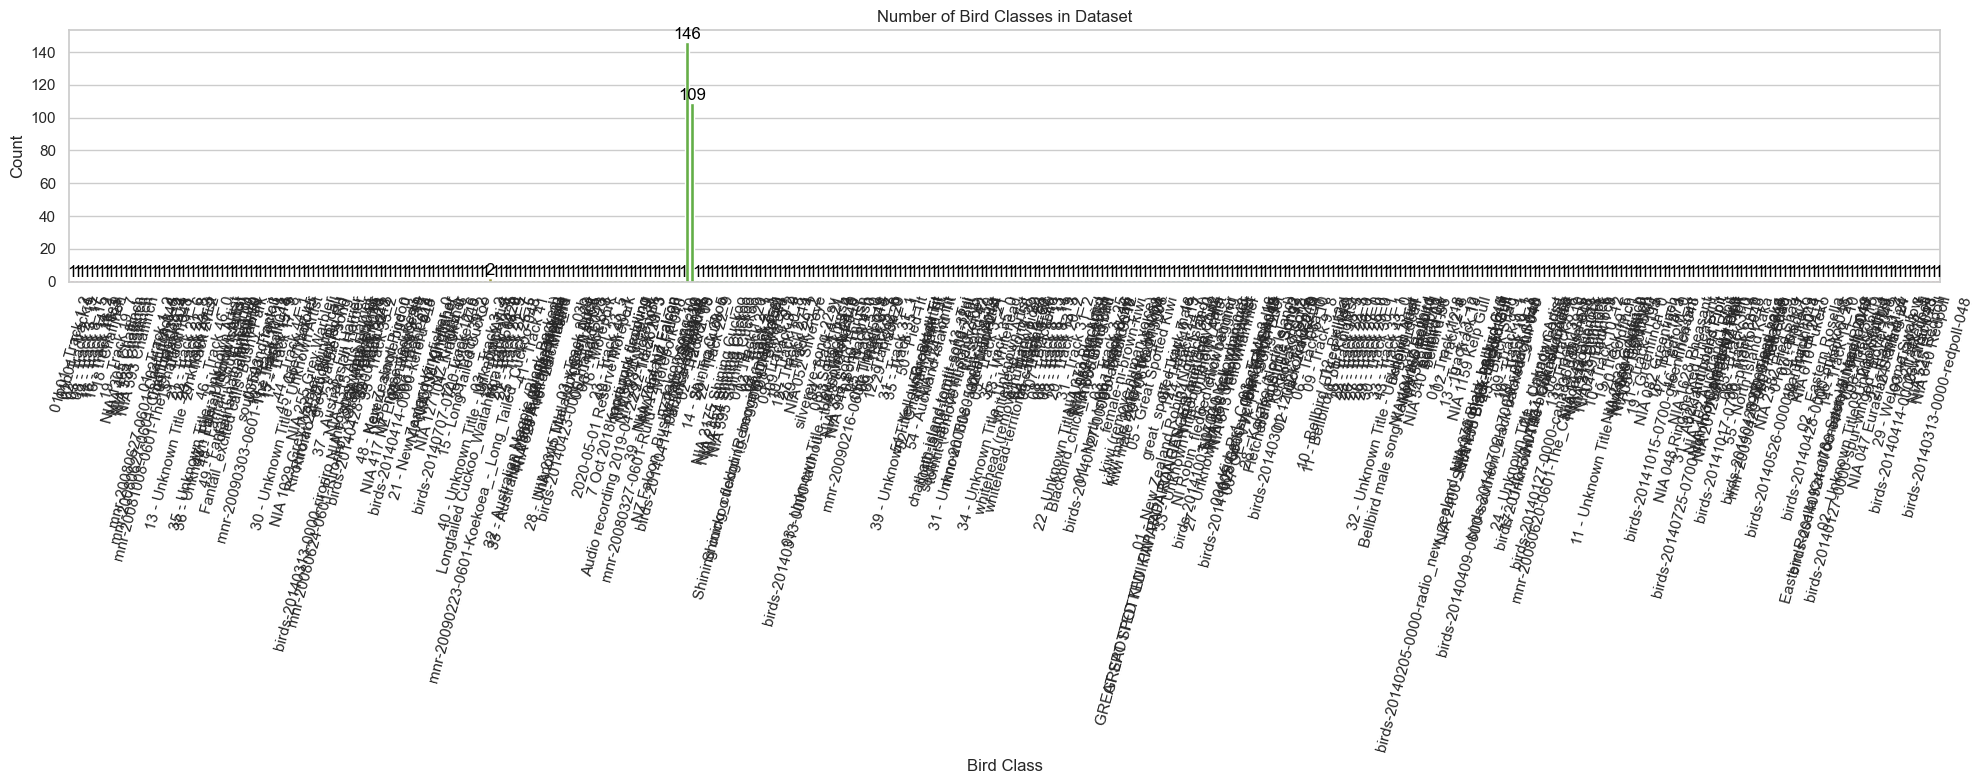

In [7]:
# counter for each bird subfolder #Change file names
bird_class_counts = Counter()

# Iterate through each bird class and name
for folds in folders:
    folder_path=f'{dataset_path}/{folds}'
    wav_files=librosa.util.find_files((folder_path) , ext='wav')
    bird_classes=[extract_bird_name(os.path.basename(file)) for file in wav_files]
    bird_class_counts.update(bird_classes)

plot_bird_class_counts(bird_class_counts)

In [8]:
# Statistical summary
sum_count, mean_count, max_count, min_count = calculate_statistics(bird_class_counts)

print(f"[Total]: {sum_count}")
print(f"[Mean]: {mean_count:.2f}")
print(f"[Max]: {max_count}")
print(f"[Min]: {min_count}")

[Total]: 643
[Mean]: 1.65
[Max]: 146
[Min]: 1


## Audio Preprocessing

In [9]:
# Loop through each folder to check audio quality

# Set path directory
folds = os.listdir(dataset_path)

# Loop through each fold
for fold in tqdm(folds, desc='Progression'):
    folder_path = os.path.join(dataset_path, fold)
    wav_files = librosa.util.find_files(folder_path, ext='wav')
    
    # Loop through each wav file in the folder
    for wav_file in wav_files:
        audio, sr = librosa.load(wav_file, sr=None)
        print(f"Sample rate for {wav_file}: {sr} Hz")

Progression:   0%|                                                                              | 0/44 [00:00<?, ?it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\01b01 - Track 1-2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\01b01 - Track 1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\02 - Track 2_19.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\03 - Track 3_17.wav: 44100 Hz


Progression:   2%|█▌                                                                    | 1/44 [00:02<01:41,  2.35s/it]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\08 - Track 8_15.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\14 - Track 14_2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\16 - Track 16_1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\16 - Track 16_9.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\18 - Chaffinch.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\18a.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\19 - Track 19_7.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\NIA 1305 Chaffinch.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\NIA 465 Chaffinch.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold1\NIA 534 Chaffinch.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updat

Progression:   7%|████▊                                                                 | 3/44 [00:02<00:30,  1.33it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold11\29 - Track 29_3.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold11\39 - New Zealand Falcon.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold11\NIA 1054 NZ Falcon.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold11\NIA 205 NZ Falcon.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold11\NZ Falcon_Bushy Park_20071220.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold11\birds-20140414-0600-karearea-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold11\nz-falcon-song-10.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold11\nz-falcon-song-12.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.

Progression:   9%|██████▎                                                               | 4/44 [00:03<00:22,  1.78it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.18.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.19.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.20.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.21.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.22.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.23.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.24.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.25.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold12\Paradise_Shelduck.26.wav: 

Progression:  11%|███████▉                                                              | 5/44 [00:03<00:22,  1.76it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.89.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.9.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.90.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.91.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.92.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.93.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.94.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.95.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.96.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.97.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold13\Rifleman.98.wav

Progression:  14%|█████████▌                                                            | 6/44 [00:04<00:17,  2.18it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold14\Shining_cuckoo (Remove Human Voice).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\01 - Track 1_20.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\02 - Track 2_1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\02 - Track 2_3.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\03 - Track 3_1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\03 - Track 3_2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\06 - Track 6_24.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\08 - Silvereye.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\09 - Track 9_9-2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\09 - Track 9_9.wav: 44100 Hz
Sample rate for C:\Users\

Progression:  16%|███████████▏                                                          | 7/44 [00:04<00:18,  1.99it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\27 - Track 27_4.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\29 - Track 29_2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\NIA 052 Silvereye.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\birds-20140313-0000-tauhou_-_the_silvereye-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold15\silvereye-song-22sy.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold16\03 - Unknown Title - Unknown Artist_0.wav: 44100 Hz


Progression:  18%|████████████▋                                                         | 8/44 [00:04<00:15,  2.39it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold16\04 - Track 4_21.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold16\06 - Song Thrush.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold16\23 - Track 23_4.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold16\24 - Track 24_6.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold16\NIA 388 Song Thrush.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold16\NIA 944 Song Thrush.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold16\mnr-20090216-0601-Thrush-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold17\04 - Track 4_0.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold17\05 - Track 5_0.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold17\05 - Track 5_19.wav: 44100 Hz
Sample rate for C:\U

Progression:  20%|██████████████▎                                                       | 9/44 [00:05<00:20,  1.72it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold17\north-island-tomtit-song-18ni.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold17\south-island-tomtit-song-24yb.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold17\tomtit (remove human voice).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold18\13 - Tui.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold18\31 - Unknown Title - Unknown Artist.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold18\mnr-20080805-0601-Tui-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold18\tui-song-42.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold18\tui-song-50.wav: 44100 Hz


Progression:  23%|███████████████▋                                                     | 10/44 [00:06<00:16,  2.04it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold19\02 - Track 2_4.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold19\03 - Track 3_21.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold19\34 - Unknown Title - Unknown Artist.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold19\35 - Track 35_0.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold19\43 - Whitehead.wav: 44100 Hz


Progression:  25%|█████████████████▎                                                   | 11/44 [00:06<00:15,  2.15it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold19\whitehead (remove human voice).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold19\whitehead-song-56.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold19\whitehead-territorial-call-male-60.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold2\01 - Track 1_2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold2\02 - Track_4.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold2\03 - Track 3_14.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold2\09 - Track 9_4.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold2\13 - Track 13_1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold2\13 - Unknown Title - Unknown Artist.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold2\21 - Track 21_6.wav: 44100

Progression:  27%|██████████████████▊                                                  | 12/44 [00:07<00:20,  1.54it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold2\south-island-fantail.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\01 - Track 1_22.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\02 - Track 2_23.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\03 - Track 3_22.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\03 - Track 3_26.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\07 - Blackbird.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\08 - Track 8_13.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\08 - Track 8_14.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\08 - Track 8_19.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\13 - Track 13_3.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdPr

Progression:  30%|████████████████████▍                                                | 13/44 [00:08<00:18,  1.63it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\31 - Track 31_2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\Blackbird_chick_importuning call.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\NIA 373 Blackbird.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\NIA 582 Blackbird.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\NIA 655 Blackbird.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold20\birds-20140127-0000-blackbird-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold21\01 - North Island Brown Kiwi.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold21\03 - Track 3_25.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold21\06 - Track 6_16.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold21\09 - Track 9_12.

Progression:  32%|█████████████████████▉                                               | 14/44 [00:08<00:15,  1.96it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold21\kiwi (remove human voice).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold21\kiwi male 20170616_183008.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold21\kiwi male 20170616_213008.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold21\male-ni-brown-kiwi.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold22\01 - Track 1_24.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold22\05 - Great Spotted Kiwi.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold22\GREAT SPOTTED KIWI PAPAROA RANGES -edit one Copy cut2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold22\GREAT SPOTTED KIWI PAPAROA RANGES -edit one Copy.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold22\great_spotted_kiwi_male.wav: 44100 Hz


Progression:  34%|███████████████████████▌                                             | 15/44 [00:08<00:11,  2.49it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold23\01 - New Zealand Robin (North Island).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold23\07 - Track 7_18.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold23\12 - Track 12_13.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold23\14 - Track 14_7.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold23\33 - Unknown Title - Unknown Artist.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold23\34 - Track 34_0.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold23\NI Robin_alarm_calls.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold23\NI Robin_fledged chick begging.wav: 44100 Hz


Progression:  39%|██████████████████████████▋                                          | 17/44 [00:08<00:07,  3.52it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold23\birds-20141003-0700-black_robin-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold24\16 - Yellowhammer.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold24\27 - Unknown Title - Unknown Artist.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold24\NIA 040 Yellowhammer.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold24\NIA 366 Yellowhammer.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold24\NIA 613 Yellowhammer.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold24\birds-20141028-0900-yellowhammer-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold25\004 Kid_Pr1_Contacts,Mew,Juv.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold25\005 Grassy_Quad_Pr_Song1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdP

Progression:  41%|████████████████████████████▏                                        | 18/44 [00:09<00:07,  3.27it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold25\kokako-song.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\02 - Track 2(1)_2 (1).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\02 - Track 2_9.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\02a_0.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\06 - Track 6_10.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\08a_0.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\09 - Track 9_8.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\10 - Bellbird (Three Kings).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\11 - Bellbird (Poor Knights).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\12 - Bellbird.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdPr

Progression:  43%|█████████████████████████████▊                                       | 19/44 [00:10<00:12,  1.99it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\bellbird-56.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold26\birds-20140205-0000-radio_new_zealand_internationals_bellbird-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold27\01 - Track 1_18.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold27\02 - Track 2_6.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold27\12-a.wav: 44100 Hz


Progression:  45%|███████████████████████████████▎                                     | 20/44 [00:10<00:10,  2.28it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold27\13 - Track 13_12.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold27\19 - Track 19.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold27\NIA 1159 Kelp Gull.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold27\NIA 2400 Southern Black-backed Gull.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold27\NIA 370 Black-backed Gull.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold27\NIA 435 Black-backed Gull.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold27\birds-20140409-0600-southern_black-backed_gull-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold28\17 - Track 17_7.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold28\43 - Black Shag.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\

Progression:  50%|██████████████████████████████████▌                                  | 22/44 [00:10<00:06,  3.39it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold29\10 - Track 10_1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold29\19 - Track 19_3.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold29\20 - Black Swan.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold29\24 - Unknown Title - Unknown Artist.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold29\birds-20140430-0700-black_swan-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold3\03b03 - Track 3.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold3\10 - Track 10_11.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold3\11 - Track 11_14.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold3\15 - Track 15_9.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold3\17 - Track 17_8.wav: 44100 Hz
Samp

Progression:  52%|████████████████████████████████████                                 | 23/44 [00:11<00:06,  3.21it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold3\Riroriro at 225 Buckley Rd.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold3\birds-20140313-0000-riroriro_-_the_grey_warbler-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold3\grey-warbler-song.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold3\mnr-20080624-0601-Riroriro_-_Grey_Warbler-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold30\17 - Unknown Title - Unknown Artist.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold30\21 - Canada Goose.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold30\NIA 444 Canada Goose.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold30\birds-20140127-0000-canada_goose-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold30\mnr-20080620-0601-The_Canada_Goose-048.wav:

Progression:  57%|███████████████████████████████████████▏                             | 25/44 [00:11<00:04,  4.29it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold31\08 - Track 8_6.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold31\13 - Track 13_10.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold31\19 - Track 19_5.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold31\36 - Dunnock.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold31\NIA 1442 Dunnock.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold31\NIA 1444 Dunnock.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold31\NIA 215 Dunnock.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold31\NIA 249 Dunnock.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold32\01 - Track 1_9.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold32\10 - Track 10_12.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProjec

Progression:  61%|██████████████████████████████████████████▎                          | 27/44 [00:11<00:03,  4.33it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold33\05 - Track 5(1).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold33\11 - Track 11_15.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold33\19 - Greenfinch_0.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold33\19a.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold33\NIA 082 Greenfinch.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold33\birds-20141015-0700-greenfinch-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold34\18 - Track 18_1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold34\47 - Peafowl_0.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold34\47a.wav: 44100 Hz


Progression:  68%|███████████████████████████████████████████████                      | 30/44 [00:12<00:02,  6.71it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold35\46 - Pheasant.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold35\NIA 048 Ring-necked Pheasant.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold35\NIA 1628 Pheasant.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold35\birds-20140725-0700-common_pheasant-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold36\31 - Auckland Island Pipit.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold36\32 - Antipodes Pipit.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold36\NIA 102 Auckland I Pipit.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold36\NIA 153 Campbell I Pipit.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold36\NIA 2012301139 NZ Pipit.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_update

Progression:  73%|██████████████████████████████████████████████████▏                  | 32/44 [00:12<00:01,  6.02it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold38\22 - Track 22_4.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold38\44 - Pied Shag.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold38\NIA 2382 Pied Shag.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold38\birds-20140526-0000-karuhiruhi-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold39\01 - Track 1_1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold39\07 - Track 7.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold39\09 - Pukeko.wav: 44100 Hz


Progression:  77%|█████████████████████████████████████████████████████▎               | 34/44 [00:12<00:01,  6.35it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold39\10 - Track 10_4.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold39\24 - Track 24_1.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold39\NIA 610 Pukeko.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold39\birds-20140428-0000-pukeko-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold4\37 - Australasian Harrier.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold4\38 - Fiji Harrier.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold4\NIA 1315 Aus Harrier.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold4\NIA 1930 Swamp Harrier.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold4\birds-20140428-0000-kahu-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold40\02 - Eastern Rosella.wav

Progression:  86%|███████████████████████████████████████████████████████████▌         | 38/44 [00:13<00:00,  7.65it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold42\23 - Starling.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold42\NIA 047 Eurasian Starling juv.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold43\11 - Track 11_2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold43\21 - Track 21_7.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold43\24 - Track 24.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold43\29 - Welcome Swallow.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold43\birds-20140414-0000-warou-048.wav: 44100 Hz


Progression:  89%|█████████████████████████████████████████████████████████████▏       | 39/44 [00:13<00:00,  7.20it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold44\03 - Track 3_3.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold44\17 - Track 17_5.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold44\21 - Redpoll.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold44\23 - Track 23.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold44\NIA 525 Redpoll.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold44\NIA 640 Redpoll.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold44\birds-20140313-0000-redpoll-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold5\04 - Track 4_15.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold5\06 - Track 6_21.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold5\32 - Track 32_2.wav: 44100 Hz
Sample rate for C:\Users\leeju\Bi

Progression:  93%|████████████████████████████████████████████████████████████████▎    | 41/44 [00:13<00:00,  8.13it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold6\03 - Track 3_19.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold6\06 - Track 6_17.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold6\06 - Track 6_4.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold6\21 - New Zealand Kingfisher_0.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold6\21a.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold6\NIA 035 NZ Kingfisher.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold6\NIA 036 Kingfisher.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold6\NIA 1271 NZ Kingfisher.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold6\birds-20140707-0700-kotare-048.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold7\04 - Track 4_6.wav: 44100 Hz
Sample rate for C:\

Progression:  95%|█████████████████████████████████████████████████████████████████▊   | 42/44 [00:14<00:00,  5.89it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\03 - Track 3_2.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\07 - Track 7_3.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\12 - Track 12_5.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\18 - Track 18_8.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\21 - Track 21_5.wav: 44100 Hz


Progression:  98%|███████████████████████████████████████████████████████████████████▍ | 43/44 [00:14<00:00,  4.38it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\22 - Track 22_7.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\25 - Track 25_5.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\32 - Australian Magpie (Black-Backed).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\33 - Australian Magpie (White-Backed).wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\41 - Track 41.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\NIA 2369 Australian Magpie.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold8\NIA 829 Australian Magpie.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold9\02 - Track 2_22.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold9\16 - Track 16_11.wav: 44100 Hz


Progression: 100%|█████████████████████████████████████████████████████████████████████| 44/44 [00:14<00:00,  3.01it/s]

Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold9\25 - Mallard.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold9\28 - Unknown Title - Unknown Artist.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold9\NIA 2315 Mallard X Grey Duck.wav: 44100 Hz
Sample rate for C:\Users\leeju\BirdProject\dataset_updated\fold9\birds-20140423-0000-mallard-048.wav: 44100 Hz


Audios are all 41k sample rate. Gonna use standard 22050 sample rate for all audio when processing for faster computational and analysing

In [10]:
# Audio path of a sample not noise reduced
#sample = r'C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.01.wav'
sample = r'C:\Users\leeju\BirdProject\data_for_code_new\fold1\Australasianbittern.01.wav'

In [11]:
# Sample without noise reduced
ipd.Audio(sample)

In [12]:
# Validate sample rate of 22050
print(sr)

44100


In [13]:
# Check number of audio samples in audio signal
audio.shape

(1240704,)

In [14]:
# Double check audio's length in seconds
66150/sr

1.5

## Audio Engineering

### Noise reduce cite:

```
@article{sainburg2020finding,
  title={Finding, visualizing, and quantifying latent structure across diverse animal vocal repertoires},
  author={Sainburg, Tim and Thielk, Marvin and Gentner, Timothy Q},
  journal={PLoS computational biology},
  volume={16},
  number={10},
  pages={e1008228},
  year={2020},
  publisher={Public Library of Science}
}

@software{tim_sainburg_2019_3243139,
  author       = {Tim Sainburg},
  title        = {timsainb/noisereduce: v1.0},
  month        = jun,
  year         = 2019,
  publisher    = {Zenodo},
  version      = {db94fe2},
  doi          = {10.5281/zenodo.3243139},
  url          = {https://doi.org/10.5281/zenodo.3243139}
}
```

In [15]:
# Declare audio path of 2 samples
c_sample = r'C:\Users\leeju\BirdProject\dataset_updated\fold1\mnr-20080627-0601-Chaffinch-048.wav'

In [16]:
# Load audio signals using librosa
crnz, sr = librosa.load(c_sample, sr=22050)

In [17]:
sr

22050

In [18]:
# Audio in 1D array, mono-channel with librosa
crnz

array([-6.1228735e-07,  1.6854711e-06,  3.8645467e-06, ...,
       -3.0612224e-05, -2.7874084e-05, -3.3190416e-05], dtype=float32)

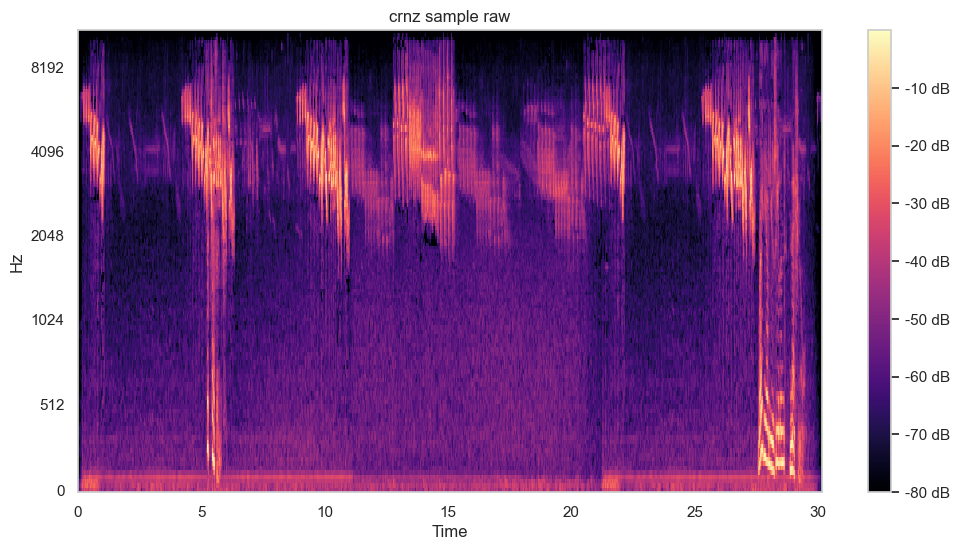

In [19]:
# Create this into a function later
sample0 = librosa.feature.melspectrogram(y=crnz,
                                         sr=sr, 
                                         n_fft=2048, 
                                         hop_length=512, 
                                         n_mels=128)
# mel_spectrogram is taken in by M_db
M_db = librosa.power_to_db(sample0, ref=np.max)
plt.figure(figsize=(12,6)) # Image display only
image = librosa.display.specshow(M_db,        
                                 x_axis='time',
                                 y_axis='mel', 
                                 sr=sr)
plt.title("crnz sample raw")
plt.colorbar(image, format="%2.f dB")
ipd.Audio(data=crnz, rate=sr)

In [20]:
# Apply stationary noise reduction (calculates each frequency channel for noise gate). We use stationary here because we cannot predict when unwanted audio will be present 
reduced_noise_crnz = nr.reduce_noise(y=crnz, 
                                     sr=sr, 
                                     n_fft=2048, 
                                     hop_length=512,  
                                     stationary=True)

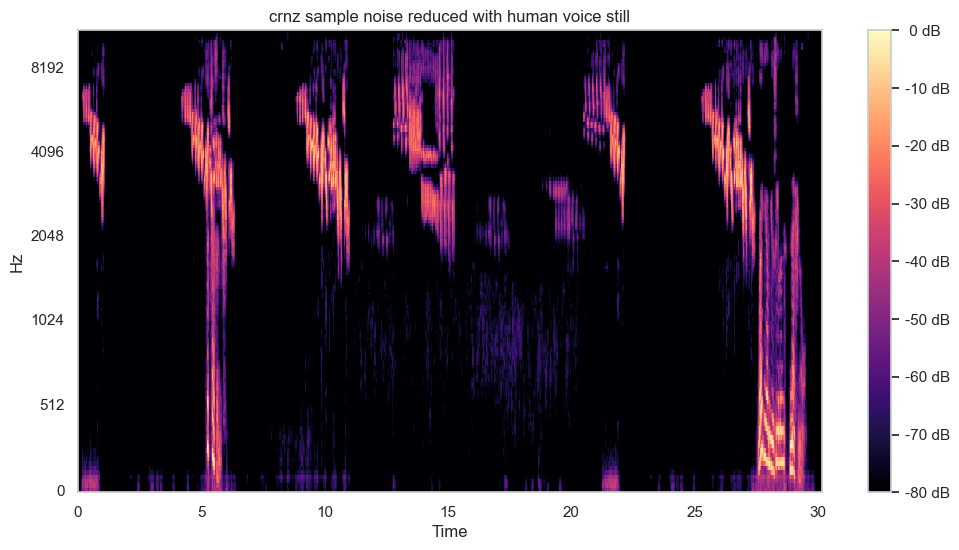

In [21]:
# Hear sample audio and plot mel-spectrogram

sample1 = librosa.feature.melspectrogram(y=reduced_noise_crnz,
                                         sr=sr, 
                                         n_fft=2048, 
                                         hop_length=512, 
                                         n_mels=128)
# mel_spectrogram is taken in by M_db
M_db = librosa.power_to_db(sample1, ref=np.max)
plt.figure(figsize=(12,6)) # Image display only
image = librosa.display.specshow(M_db,        
                                 x_axis='time',
                                 y_axis='mel', 
                                 sr=sr)
plt.title("crnz sample noise reduced with human voice still")
plt.colorbar(image, format="%2.f dB")
ipd.Audio(data=reduced_noise_crnz, rate=sr)

The background noise has been successfully reduce, however, the narrator's voice still remains seen by the long line down the mel axis (Hz in librosa). We got to filter out the human voice first. I will perform attenuating and removing the human vocal as seen in figure 1 to 4. 

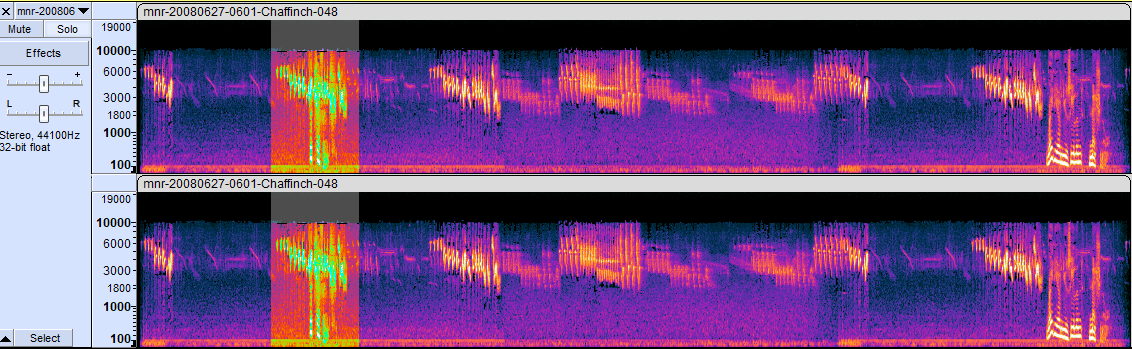
##### Fig 1. Focusing area of sample audio to remove human vocal and attenuate.
#
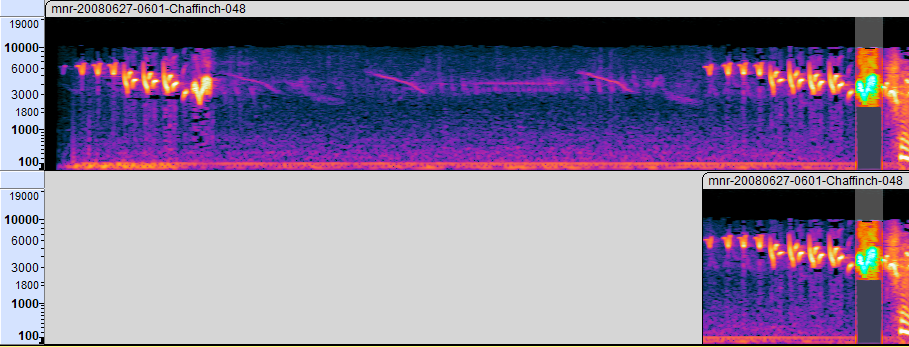
##### Fig 2. Highlight section with unwanted human vocal with bird noise. Rest remove.
#
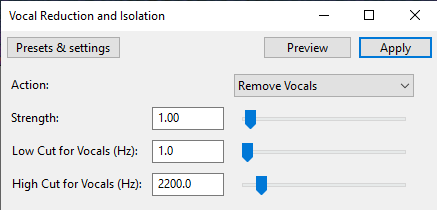
##### Fig 3. Frequency cutoff to remove human vocal.
#
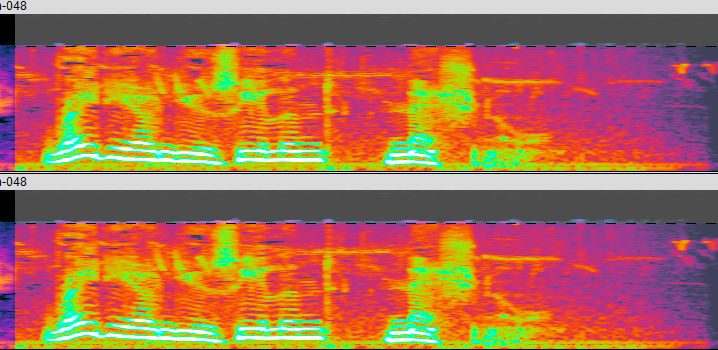
##### Fig 4. Remove this section as human vocal.
#

In [22]:
# Declare audio path of 2 samples
#UPDATED
c_sample = r'C:\Users\leeju\BirdProject\dataset_updated\fold1\mnr-20080627-0601-Chaffinch-048_2.wav'

In [23]:
# Load audio signals using librosa
crnz2, sr = librosa.load(c_sample, sr=22050)

In [24]:
# Apply stationary noise reduction (calculates each frequency channel for noise gate). We use stationary here because we cannot predict when unwanted audio will be present 
reduced_noise_crnz2 = nr.reduce_noise(y=crnz2, 
                                     sr=sr, 
                                     n_fft=2048, 
                                     hop_length=512,  
                                     stationary=True)

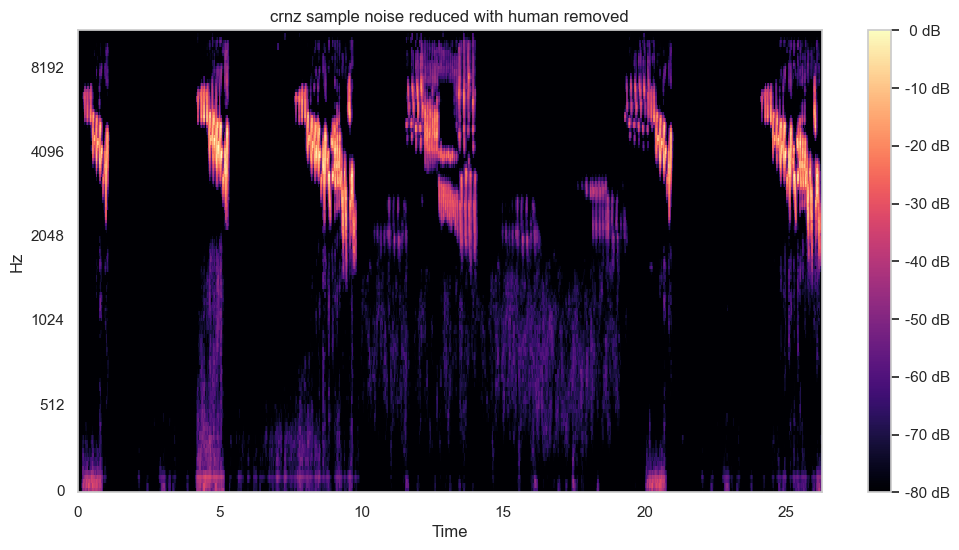

In [25]:
# Hear sample audio and plot mel-spectrogram

sample2 = librosa.feature.melspectrogram(y=reduced_noise_crnz2,
                                         sr=sr, 
                                         n_fft=2048, 
                                         hop_length=512, 
                                         n_mels=128)
# mel_spectrogram is taken in by M_db
M_db = librosa.power_to_db(sample2, ref=np.max)
plt.figure(figsize=(12,6)) # Image display only
image2 = librosa.display.specshow(M_db,        
                                 x_axis='time',
                                 y_axis='mel', 
                                 sr=sr)
plt.title("crnz sample noise reduced with human removed")
plt.colorbar(image2, format="%2.f dB")
ipd.Audio(data=reduced_noise_crnz2, rate=sr)

This audio still has residuals that needs to be filtered. Then, rest of the audio will need to be segmented into approx 3 seconds and remove blank areas.

## Fourth Order Butterworth Filter

In [26]:
# Define the filter order and normalized critical frequency
order=4
cutoff_freq=3000

# Design the digital high-pass Butterworth filter
b, a = butter(N=order, Wn=cutoff_freq / (0.5 * sr), btype='high', analog=False)

# Apply the filter to the audio data using lfilter
filtered_audio_crnz2 = lfilter(b, a, reduced_noise_crnz2)

In [27]:
# From scipy website: https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html

def butter_bandpass(cutoff_freq, fs, order=4):
    nyq = 0.5 * fs
    cutoff_freq = 4500
    b, a = butter(order, cutoff_freq, btype='highpass')
    return b, a


def butter_bandpass_filter(data, cutoff_freq, fs, order=4):
    b, a = butter_bandpass(cutoff_freq, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = sr
    cutoff_freq = 4092

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [1, 2, 4, 8]:
        b, a = butter_bandpass(cutoff_freq, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)') # Cutoff threshold
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

run()

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

<Figure size 640x480 with 0 Axes>

Order 2 has a much better smoothing method over 4 and 8.

In [ ]:
sample3 = librosa.feature.melspectrogram(y=filtered_audio_crnz2,
                                         sr=sr, 
                                         n_fft=2048, 
                                         hop_length=512, 
                                         n_mels=128)
# mel_spectrogram is taken in by M_db
M_db = librosa.power_to_db(sample3, ref=np.max)
plt.figure(figsize=(12,6)) 
image3 = librosa.display.specshow(M_db,        
                                 x_axis='time',
                                 y_axis='mel', 
                                 sr=sr)
plt.title("crnz sample noise reduced and filtered")
plt.colorbar(image3, format="%2.f dB")
ipd.Audio(data=filtered_audio_crnz2, rate=sr)

In [96]:
dataset_path2=r'C:\Users\leeju\BirdProject\test'

In [97]:
folders2 = ['fold12', 'fold13']

In [129]:
# Function to reduce noise
def reduce_bulk(dataset_path2):
    r_audios = [] # mel features (Noise reduced)
    bird_names = [] # labels
    folds = os.listdir(dataset_path2)
    
    for fold in tqdm(folds, desc='Progression'):
        folder_path = os.path.join(dataset_path2, fold)
        wav_files = librosa.util.find_files(folder_path, ext='wav')
    
        # Loop through each wav file in the folder
        for wav_file in wav_files:
            audios, sr = librosa.load(wav_file, sr=22050)
            reduced_noise = nr.reduce_noise(y=audios,
                                            sr=sr,
                                            n_fft=2048,
                                            hop_length=512,
                                            stationary=True)
            
            r_audios.append(reduced_noise)
            bird_names.append(extract_bird_name(os.path.basename(wav_file)))

    # Check shapes of elements in r_audios
    for audio in r_audios:
        print(audio.shape)
            
    # Create a TensorFlow dataset. Slice tensors for dependent and independent variables
    dataset = tf.data.Dataset.from_tensor_slices((r_audios, bird_names))
    
    return dataset

In [130]:
mel_data = reduce_bulk(dataset_path2)

Progression: 100%|███████████████████████████████████████████████████████████████████████| 2/2 [00:15<00:00,  7.73s/it]


ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [131]:
mel_data

<_TensorSliceDataset element_spec=TensorSpec(shape=(0,), dtype=tf.float64, name=None)>

In [38]:
# Hear sample audio and plot mel-spectrogram

sample = librosa.feature.melspectrogram(y=reduced_noise, 
                                       sr=sr, 
                                       n_fft=2048, 
                                       hop_length=512, 
                                       n_mels=128)
# mel_spectrogram is taken in by M_db
M_db = librosa.power_to_db(sample, ref=np.max)
plt.figure(figsize=(12,6)) # Image display only
image = librosa.display.specshow(M_db,        
                                 x_axis='time',
                                 y_axis='mel', 
                                 sr=sr)
plt.title("Austra_04_sample")
plt.colorbar(image, format="%2.f dB")
ipd.Audio(data=reduced_noise, rate=sr)

NameError: name 'reduced_noise' is not defined

In [ ]:
folder_path = os.path.join(dataset_path, fold)

In [ ]:
# labelencoder to map class for labeling and numeric values
name_to_num = LabelEncoder()

In [ ]:
# function to extract mel-spectrogram for cv. store Mel-Spectrogram to a list along with label
def generate_mel_spectrograms(folds):
    mel_spectrograms = []
    labels = []
    
    for fold in tqdm(folds, desc='Progression'):

        for wav_file in tqdm(wav_files, desc=f"Processing {fold}"):
            bird, sr = librosa.load(wav_file, sr=22050)
            mel_spectrogram = librosa.feature.melspectrogram(y=bird, 
                                                             sr=22050,
                                                             n_fft=2048, 
                                                             hop_length=512, 
                                                             n_mels=128)
            M_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
            mel_spectrograms.append(M_db)
            labels.append(extract_bird_class(os.path.basename(wav_file)))
            
            # String to numerical labels using LabelEncoder
            encoded_labels = [name_to_num.fit_transform(lbls) for lbls in labels]

    return mel_spectrograms, encoded_labels

In [ ]:
def get_mfcc(wav_file_path):
    y, sr = librosa.load(wav_file_path, offset=0, duration=30)
    mfcc = numpy.array(librosa.feature.mfcc(y=y, sr=sr))
    return mfcc

In [ ]:
example_file = "dataset/classical/classical.00015.wav"
mfcc = get_mfcc(example_file)
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
def get_mel_feature(#file_path):
    mel_spectrogram = numpy.concatenate()

In [ ]:
def get_mfcc_feature(#file_path):
    mfcc_feature = numpy.concatenate()

In [ ]:
#From website example
directory = 'dataset'
genres = ['reggae','classical','rock']
features = []
labels = []
for genre in genres:
    print("Calculating features for genre : " + genre)
    for file in os.listdir(directory+"/"+genre):
        file_path = directory+"/"+genre+"/"+file

        features.append(get_feature(file_path))
        label = genres.index(genre)
        labels.append(label)